In [1]:
import pandas as pd
import numpy as np
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing, cluster)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle
from scipy import stats
import sys
from numpy import unique
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.mixture import BayesianGaussianMixture

sys.path.insert(0, '../Service/')

from DataPreprocessingService import *

seed = 42
np.random.seed(seed)

In [2]:
dataframe = pd.read_csv("../Data/data.csv")

In [3]:
dataframe

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,d052a2d9-5574-4bbd-9753-fc5e77e5314b,0,1,51,20,0,2338,91,81,71,11,30,"[3, 0, 0, 0, 0, 7, 3, 3, 2, 1, 0, 8, 0]",1,139,"[4, 3, 2, 0, 0, 1, 0, 0, 2, 13, 4, 9, 5, 5, 3,...","[6, 6, 7, 15, 8, 5, 5, 6, 12, 6, 7, 9, 107, 69...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, ...","[0.0, 4.54, 3.65, 3.52, 1.76, 5.45, 7.31, 4.92...",90
1,1f3fc284-e3a3-4ec2-b874-76cc0ede5d00,0,0,48,7,0,4568,65,136,114,4,70,"[1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 1, 0, ...",0,183,"[6, 13, 9, 14, 11, 10, 0, 5, 9, 2, 6, 3, 4, 6,...","[19, 6, 62, 28, 41, 23, 28, 5, 18, 8, 10, 5, 9...","[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.76, 1.4, 1.63, 2.21, 2.17, 0.0, 2.25, 2.09,...",117
2,e2057b6d-0e44-4083-b2cc-63e1968796f1,2,0,71,11,0,3258,272,86,86,4,39,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",0,294,"[11, 6, 42, 2, 58, 24, 5, 5, 1, 4, 7, 2, 2, 3,...","[77, 23, 212, 23, 141, 66, 14, 8, 7, 29, 30, 2...","[12, 6, 20, 0, 57, 8, 3, 0, 0, 0, 0, 0, 0, 1, ...","[0.84, 1.48, 1.91, 0.86, 12.89, 0.1, 2.13, 2.8...",84
3,f2429d7e-c5e5-4869-8355-dcc7569fcd6b,0,89,10461,1279,47,206941,79911,4274,2108,38,1456,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, ...",52,8222,"[8, 2, 54, 6, 7, 7, 3, 13, 8, 9, 65, 13, 19, 1...","[86, 7, 171, 22, 12, 10, 24, 21, 35, 27, 9, 24...","[4, 6, 110, 10, 21, 14, 83, 45, 73, 25, 12, 30...","[0.06, 0.05, 0.1, 0.15, 0.18, 0.25, 0.24, 0.13...",2893
4,ef1ddc31-3f2f-477c-bae1-360b611e1eff,4,0,44,2,0,1163,26,45,23,1,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,112,"[9, 7, 0, 5, 9, 4, 6, 6, 5, 18, 23, 23, 2, 3, ...","[9, 12, 54, 53, 12, 23, 32, 19, 59, 30, 32, 84...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0.05, 0.6, 0.84, 0.65, 65.23, 0.04, 1.77, 0.8...",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,dac8b9ce-4de4-4c4b-b7c1-1dab7bc38386,2,28,431,9,4,9365,3560,110,83,0,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,160,"[37, 8, 11, 17, 18, 21, 24, 19, 28, 62, 23, 37...","[90, 62, 70, 399, 105, 128, 220, 166, 452, 708...","[80, 29, 55, 419, 67, 95, 232, 146, 473, 383, ...","[3.81, 1.65, 1.02, 1.4, 1.13, 2.01, 1.6, 2.87,...",48
623,6b45f19a-d740-4204-8c32-f3ca4d45e172,1,3,58,3,4,1130,113,26,9,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,69,"[0, 41, 18, 7, 16, 57, 14]","[26, 332, 86, 58, 115, 437, 61, 15]","[0, 21, 35, 1, 0, 36, 3, 17]","[5.03, 2.1, 1.7, 0.67, 2.21, 0.84, 4.47, 3.48,...",8
624,5172e1e8-812e-4ba2-8999-9c7445570e26,0,63,2497,189,36,24621,5363,512,185,2,66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",72,1375,"[91, 35, 23, 30, 30, 24, 32, 31, 42, 91, 20, 2...","[14, 496, 101, 22, 126, 78, 39, 80, 38, 120, 7...","[20, 52, 28, 20, 20, 20, 20, 20, 23, 27, 55, 2...","[0.32, 0.9, 1.93, 1.74, 0.24, 94.92, 0.21, 99....",192
625,1451899d-d747-4a7e-b6a6-1b32339de88b,2,2135,18312,1671,499,463857,52427,14100,4104,104,1335,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3707,"[1, 1, 19, 2, 1, 2, 80, 37, 37, 33, 23, 38, 50...","[24, 36, 154, 11, 78, 9, 11, 204, 46, 32, 82, ...","[12, 1, 14, 0, 22, 0, 0, 112, 30, 36, 8, 2, 10...","[49.22, 2.26, 29.03, 0.79, 0.75, 0.69, 0.35, 0...",2232


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Project_ID               627 non-null    object
 1   EndOfLifeFramework       627 non-null    int64 
 2   ForFrequency             627 non-null    int64 
 3   IfFrequency              627 non-null    int64 
 4   ForEachFrequency         627 non-null    int64 
 5   WhileFrequency           627 non-null    int64 
 6   CodeLines                627 non-null    int64 
 7   CommentLines             627 non-null    int64 
 8   MethodNumber             627 non-null    int64 
 9   ClassNumber              627 non-null    int64 
 10  InterfaceNumber          627 non-null    int64 
 11  InheritanceDeclarations  627 non-null    int64 
 12  ExternalAPICalls         627 non-null    object
 13  HttpClientCalls          627 non-null    int64 
 14  UsingsNumber             627 non-null    i

In [5]:
pd.set_option('display.float_format', lambda x: format(x, '.0f'))
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles
count,627,627,627,627,627,627,627,627,627,627,627,627,627,627
mean,4,35,748,76,16,22579,3861,682,322,14,171,1812,862,247
std,7,167,2840,263,62,83205,13460,2006,814,36,493,44647,2347,587
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1
25%,0,0,17,1,0,1249,44,35,32,1,12,0,90,34
50%,1,1,67,7,1,3872,257,106,86,4,41,0,248,84
75%,5,8,265,34,5,12057,1546,351,236,11,118,2,700,208
max,66,2135,35665,2796,757,1498515,211030,26583,11510,380,7913,1117948,31477,8442


Removing duplicates that could be present from the ETL process

In [6]:
dataframe.drop_duplicates(subset=dataframe.loc[:, dataframe.columns != 'Project_ID'])

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,d052a2d9-5574-4bbd-9753-fc5e77e5314b,0,1,51,20,0,2338,91,81,71,11,30,"[3, 0, 0, 0, 0, 7, 3, 3, 2, 1, 0, 8, 0]",1,139,"[4, 3, 2, 0, 0, 1, 0, 0, 2, 13, 4, 9, 5, 5, 3,...","[6, 6, 7, 15, 8, 5, 5, 6, 12, 6, 7, 9, 107, 69...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, ...","[0.0, 4.54, 3.65, 3.52, 1.76, 5.45, 7.31, 4.92...",90
1,1f3fc284-e3a3-4ec2-b874-76cc0ede5d00,0,0,48,7,0,4568,65,136,114,4,70,"[1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 1, 0, ...",0,183,"[6, 13, 9, 14, 11, 10, 0, 5, 9, 2, 6, 3, 4, 6,...","[19, 6, 62, 28, 41, 23, 28, 5, 18, 8, 10, 5, 9...","[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.76, 1.4, 1.63, 2.21, 2.17, 0.0, 2.25, 2.09,...",117
2,e2057b6d-0e44-4083-b2cc-63e1968796f1,2,0,71,11,0,3258,272,86,86,4,39,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",0,294,"[11, 6, 42, 2, 58, 24, 5, 5, 1, 4, 7, 2, 2, 3,...","[77, 23, 212, 23, 141, 66, 14, 8, 7, 29, 30, 2...","[12, 6, 20, 0, 57, 8, 3, 0, 0, 0, 0, 0, 0, 1, ...","[0.84, 1.48, 1.91, 0.86, 12.89, 0.1, 2.13, 2.8...",84
3,f2429d7e-c5e5-4869-8355-dcc7569fcd6b,0,89,10461,1279,47,206941,79911,4274,2108,38,1456,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, ...",52,8222,"[8, 2, 54, 6, 7, 7, 3, 13, 8, 9, 65, 13, 19, 1...","[86, 7, 171, 22, 12, 10, 24, 21, 35, 27, 9, 24...","[4, 6, 110, 10, 21, 14, 83, 45, 73, 25, 12, 30...","[0.06, 0.05, 0.1, 0.15, 0.18, 0.25, 0.24, 0.13...",2893
4,ef1ddc31-3f2f-477c-bae1-360b611e1eff,4,0,44,2,0,1163,26,45,23,1,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,112,"[9, 7, 0, 5, 9, 4, 6, 6, 5, 18, 23, 23, 2, 3, ...","[9, 12, 54, 53, 12, 23, 32, 19, 59, 30, 32, 84...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0.05, 0.6, 0.84, 0.65, 65.23, 0.04, 1.77, 0.8...",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,dac8b9ce-4de4-4c4b-b7c1-1dab7bc38386,2,28,431,9,4,9365,3560,110,83,0,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,160,"[37, 8, 11, 17, 18, 21, 24, 19, 28, 62, 23, 37...","[90, 62, 70, 399, 105, 128, 220, 166, 452, 708...","[80, 29, 55, 419, 67, 95, 232, 146, 473, 383, ...","[3.81, 1.65, 1.02, 1.4, 1.13, 2.01, 1.6, 2.87,...",48
623,6b45f19a-d740-4204-8c32-f3ca4d45e172,1,3,58,3,4,1130,113,26,9,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,69,"[0, 41, 18, 7, 16, 57, 14]","[26, 332, 86, 58, 115, 437, 61, 15]","[0, 21, 35, 1, 0, 36, 3, 17]","[5.03, 2.1, 1.7, 0.67, 2.21, 0.84, 4.47, 3.48,...",8
624,5172e1e8-812e-4ba2-8999-9c7445570e26,0,63,2497,189,36,24621,5363,512,185,2,66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",72,1375,"[91, 35, 23, 30, 30, 24, 32, 31, 42, 91, 20, 2...","[14, 496, 101, 22, 126, 78, 39, 80, 38, 120, 7...","[20, 52, 28, 20, 20, 20, 20, 20, 23, 27, 55, 2...","[0.32, 0.9, 1.93, 1.74, 0.24, 94.92, 0.21, 99....",192
625,1451899d-d747-4a7e-b6a6-1b32339de88b,2,2135,18312,1671,499,463857,52427,14100,4104,104,1335,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3707,"[1, 1, 19, 2, 1, 2, 80, 37, 37, 33, 23, 38, 50...","[24, 36, 154, 11, 78, 9, 11, 204, 46, 32, 82, ...","[12, 1, 14, 0, 22, 0, 0, 112, 30, 36, 8, 2, 10...","[49.22, 2.26, 29.03, 0.79, 0.75, 0.69, 0.35, 0...",2232


# Data Exploration

In [7]:
dfcopy = dataframe.copy()

Getting the max global boundaries of the list columns

In [8]:
print("ClassCouplingListing " + repr(global_boundaries(dfcopy['ClassCouplingListing'])))
print("CodeSimilarity " + repr(global_boundaries(dfcopy['CodeSimilarity'])))
print("CodeLinesPerFile " + repr(global_boundaries(dfcopy['CodeLinesPerFile'])))
print("CommentLinesPerFile " + repr(global_boundaries(dfcopy['CommentLinesPerFile'])))

ClassCouplingListing (6857, 0)
CodeSimilarity (100, 0)
CodeLinesPerFile (203174, 0)
CommentLinesPerFile (47801, 0)


In [9]:
def get_boundaries(lower, higher, numberOfBins):
    boundaries = np.linspace(lower, higher, numberOfBins)
    boundaries[-1] = np.inf
    return boundaries

For CodeSimilarity, ClassCouplingListing, CodeLinesPerFile and CommentLinesPerFile, bins were made, the last bin contains all values between the previous and infinity such that all data is grouped 

In [10]:
def get_histogram_of_list_values(data):
    flat_values = [item for sublist in data for item in sublist]
    plt.hist(flat_values, edgecolor='black')

In [11]:
def boundaries_splitting(column, boundaries, column_name):
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy[bin_name] = column.apply(
            lambda x: sum(boundaries[i] <= value < boundaries[i + 1] for value in np.atleast_1d(x)))

In [12]:
type(dfcopy)

pandas.core.frame.DataFrame

In [13]:
columns = ['CodeSimilarity', 'ClassCouplingListing', 'CodeLinesPerFile', 'CommentLinesPerFile', 'ExternalAPICalls']
dfcopy = handle_list_to_median(columns, dfcopy)

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [14]:
dfcopy.head(10)

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,d052a2d9-5574-4bbd-9753-fc5e77e5314b,0,1,51,20,0,2338,91,81,71,...,"[4, 3, 2, 0, 0, 1, 0, 0, 2, 13, 4, 9, 5, 5, 3,...","[6, 6, 7, 15, 8, 5, 5, 6, 12, 6, 7, 9, 107, 69...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, ...","[0.0, 4.54, 3.65, 3.52, 1.76, 5.45, 7.31, 4.92...",90,9,4,11,0,1
1,1f3fc284-e3a3-4ec2-b874-76cc0ede5d00,0,0,48,7,0,4568,65,136,114,...,"[6, 13, 9, 14, 11, 10, 0, 5, 9, 2, 6, 3, 4, 6,...","[19, 6, 62, 28, 41, 23, 28, 5, 18, 8, 10, 5, 9...","[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.76, 1.4, 1.63, 2.21, 2.17, 0.0, 2.25, 2.09,...",117,8,6,22,0,0
2,e2057b6d-0e44-4083-b2cc-63e1968796f1,2,0,71,11,0,3258,272,86,86,...,"[11, 6, 42, 2, 58, 24, 5, 5, 1, 4, 7, 2, 2, 3,...","[77, 23, 212, 23, 141, 66, 14, 8, 7, 29, 30, 2...","[12, 6, 20, 0, 57, 8, 3, 0, 0, 0, 0, 0, 0, 1, ...","[0.84, 1.48, 1.91, 0.86, 12.89, 0.1, 2.13, 2.8...",84,12,4,23,0,0
3,f2429d7e-c5e5-4869-8355-dcc7569fcd6b,0,89,10461,1279,47,206941,79911,4274,2108,...,"[8, 2, 54, 6, 7, 7, 3, 13, 8, 9, 65, 13, 19, 1...","[86, 7, 171, 22, 12, 10, 24, 21, 35, 27, 9, 24...","[4, 6, 110, 10, 21, 14, 83, 45, 73, 25, 12, 30...","[0.06, 0.05, 0.1, 0.15, 0.18, 0.25, 0.24, 0.13...",2893,44,9,19,8,0
4,ef1ddc31-3f2f-477c-bae1-360b611e1eff,4,0,44,2,0,1163,26,45,23,...,"[9, 7, 0, 5, 9, 4, 6, 6, 5, 18, 23, 23, 2, 3, ...","[9, 12, 54, 53, 12, 23, 32, 19, 59, 30, 32, 84...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0.05, 0.6, 0.84, 0.65, 65.23, 0.04, 1.77, 0.8...",25,6,6,32,0,0
5,8135c42c-75ab-4c53-887d-5f844bad3517,0,126,7761,1368,121,186929,13861,9579,3962,...,"[7, 87, 18, 7, 13, 5, 11, 3, 3, 3, 4, 2, 9, 6,...","[15, 26, 6, 12, 251, 44, 52, 60, 48, 30, 18, 5...","[9, 4, 3, 0, 131, 9, 0, 3, 3, 3, 0, 0, 0, 4, 0...","[0.7, 0.02, 0.13, 0.04, 0.16, 0.08, 0.53, 0.46...",3776,46,7,23,0,0
6,895b4aa1-53d9-4c84-b25a-269f90463064,1,0,54,2,0,1480,188,48,42,...,"[0, 1, 8, 1, 34, 17, 4, 16, 6, 65, 2, 46, 6, 1...","[22, 13, 24, 12, 90, 49, 21, 34, 26, 355, 25, ...","[0, 0, 5, 0, 9, 14, 0, 26, 2, 68, 0, 40, 0, 1,...","[4.47, 9.7, 3.4, 4.9, 21.27, 6.31, 12.54, 3.03...",24,7,8,26,0,0
7,f6303c13-4684-49f1-ae97-14fb6c4e1c64,0,99,4531,517,136,73671,24926,2974,1712,...,"[25, 3, 1, 8, 5, 5, 14, 4, 17, 119, 48, 39, 10...","[18, 168, 5, 7, 5, 12, 13, 41, 41, 52, 5, 176,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, ...","[0.09, 0.03, 0.04, 7.3, 0.02, 4.32, 0.29, 0.23...",1139,24,10,19,10,0
8,83e4e345-9954-4f0e-bbe1-ccdb5d99c467,0,57,1753,348,15,102729,26458,5388,1908,...,"[12, 9, 24, 19, 49, 22, 14, 16, 15, 21, 43, 17...","[18, 26, 63, 47, 177, 44, 27, 57, 36, 29, 104,...","[2, 3, 2, 2, 27, 19, 3, 4, 2, 5, 12, 12, 2, 2,...","[16.36, 5.98, 0.5, 4.44, 11.84, 1.93, 5.12, 9....",1494,29,15,29,6,0
9,e46ffaca-ad41-43b8-89ab-6e2ae9c1f7ff,1,0,8,0,0,478,127,23,21,...,"[3, 25, 47, 11, 21, 10, 5, 2, 3, 5, 10, 10, 5,...","[24, 62, 99, 12, 16, 38, 44, 14, 10, 14, 29, 4...","[0, 15, 50, 6, 9, 7, 12, 5, 2, 1, 4, 1, 1, 7, 7]","[8.11, 0.65, 0.53, 27.39, 0.43, 0.32, 0.0, 23....",15,6,10,24,6,0


For ExternalAPICalls json data for each row was extracted into simple lists

In [15]:
def extract_numbers_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))
        numbers = [value for value in data if isinstance(value, int)]
        return numbers
    
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

In [16]:
dfcopy['ExternalAPIExtracted'] = dfcopy['ExternalAPICalls'].apply(extract_numbers_from_json)
dfcopy

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median,ExternalAPIExtracted
0,d052a2d9-5574-4bbd-9753-fc5e77e5314b,0,1,51,20,0,2338,91,81,71,...,"[6, 6, 7, 15, 8, 5, 5, 6, 12, 6, 7, 9, 107, 69...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, ...","[0.0, 4.54, 3.65, 3.52, 1.76, 5.45, 7.31, 4.92...",90,9,4,11,0,1,"[3, 0, 0, 0, 0, 7, 3, 3, 2, 1, 0, 8, 0]"
1,1f3fc284-e3a3-4ec2-b874-76cc0ede5d00,0,0,48,7,0,4568,65,136,114,...,"[19, 6, 62, 28, 41, 23, 28, 5, 18, 8, 10, 5, 9...","[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.76, 1.4, 1.63, 2.21, 2.17, 0.0, 2.25, 2.09,...",117,8,6,22,0,0,"[1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 1, 0, ..."
2,e2057b6d-0e44-4083-b2cc-63e1968796f1,2,0,71,11,0,3258,272,86,86,...,"[77, 23, 212, 23, 141, 66, 14, 8, 7, 29, 30, 2...","[12, 6, 20, 0, 57, 8, 3, 0, 0, 0, 0, 0, 0, 1, ...","[0.84, 1.48, 1.91, 0.86, 12.89, 0.1, 2.13, 2.8...",84,12,4,23,0,0,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ..."
3,f2429d7e-c5e5-4869-8355-dcc7569fcd6b,0,89,10461,1279,47,206941,79911,4274,2108,...,"[86, 7, 171, 22, 12, 10, 24, 21, 35, 27, 9, 24...","[4, 6, 110, 10, 21, 14, 83, 45, 73, 25, 12, 30...","[0.06, 0.05, 0.1, 0.15, 0.18, 0.25, 0.24, 0.13...",2893,44,9,19,8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, ..."
4,ef1ddc31-3f2f-477c-bae1-360b611e1eff,4,0,44,2,0,1163,26,45,23,...,"[9, 12, 54, 53, 12, 23, 32, 19, 59, 30, 32, 84...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0.05, 0.6, 0.84, 0.65, 65.23, 0.04, 1.77, 0.8...",25,6,6,32,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,dac8b9ce-4de4-4c4b-b7c1-1dab7bc38386,2,28,431,9,4,9365,3560,110,83,...,"[90, 62, 70, 399, 105, 128, 220, 166, 452, 708...","[80, 29, 55, 419, 67, 95, 232, 146, 473, 383, ...","[3.81, 1.65, 1.02, 1.4, 1.13, 2.01, 1.6, 2.87,...",48,7,18,129,11,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
623,6b45f19a-d740-4204-8c32-f3ca4d45e172,1,3,58,3,4,1130,113,26,9,...,"[26, 332, 86, 58, 115, 437, 61, 15]","[0, 21, 35, 1, 0, 36, 3, 17]","[5.03, 2.1, 1.7, 0.67, 2.21, 0.84, 4.47, 3.48,...",8,4,16,74,10,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
624,5172e1e8-812e-4ba2-8999-9c7445570e26,0,63,2497,189,36,24621,5363,512,185,...,"[14, 496, 101, 22, 126, 78, 39, 80, 38, 120, 7...","[20, 52, 28, 20, 20, 20, 20, 20, 23, 27, 55, 2...","[0.32, 0.9, 1.93, 1.74, 0.24, 94.92, 0.21, 99....",192,12,27,28,22,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
625,1451899d-d747-4a7e-b6a6-1b32339de88b,2,2135,18312,1671,499,463857,52427,14100,4104,...,"[24, 36, 154, 11, 78, 9, 11, 204, 46, 32, 82, ...","[12, 1, 14, 0, 22, 0, 0, 112, 30, 36, 8, 2, 10...","[49.22, 2.26, 29.03, 0.79, 0.75, 0.69, 0.35, 0...",2232,35,35,92,7,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [17]:
def global_boundaries_for_list(data):
    global_max = 0
    global_min = 9999

    for row in data:
        if len(row) != 0:
            row_max = np.max(row)
            row_min = np.min(row)
            if row_max > global_max:
                global_max = row_max
            if row_min < global_min:
                global_min = row_min

    return global_max, global_min

In [18]:
val1, val2 = global_boundaries_for_list(dfcopy['ExternalAPIExtracted'])
print(f'{val1} {val2}')

7342 0


# Box plots after data binning

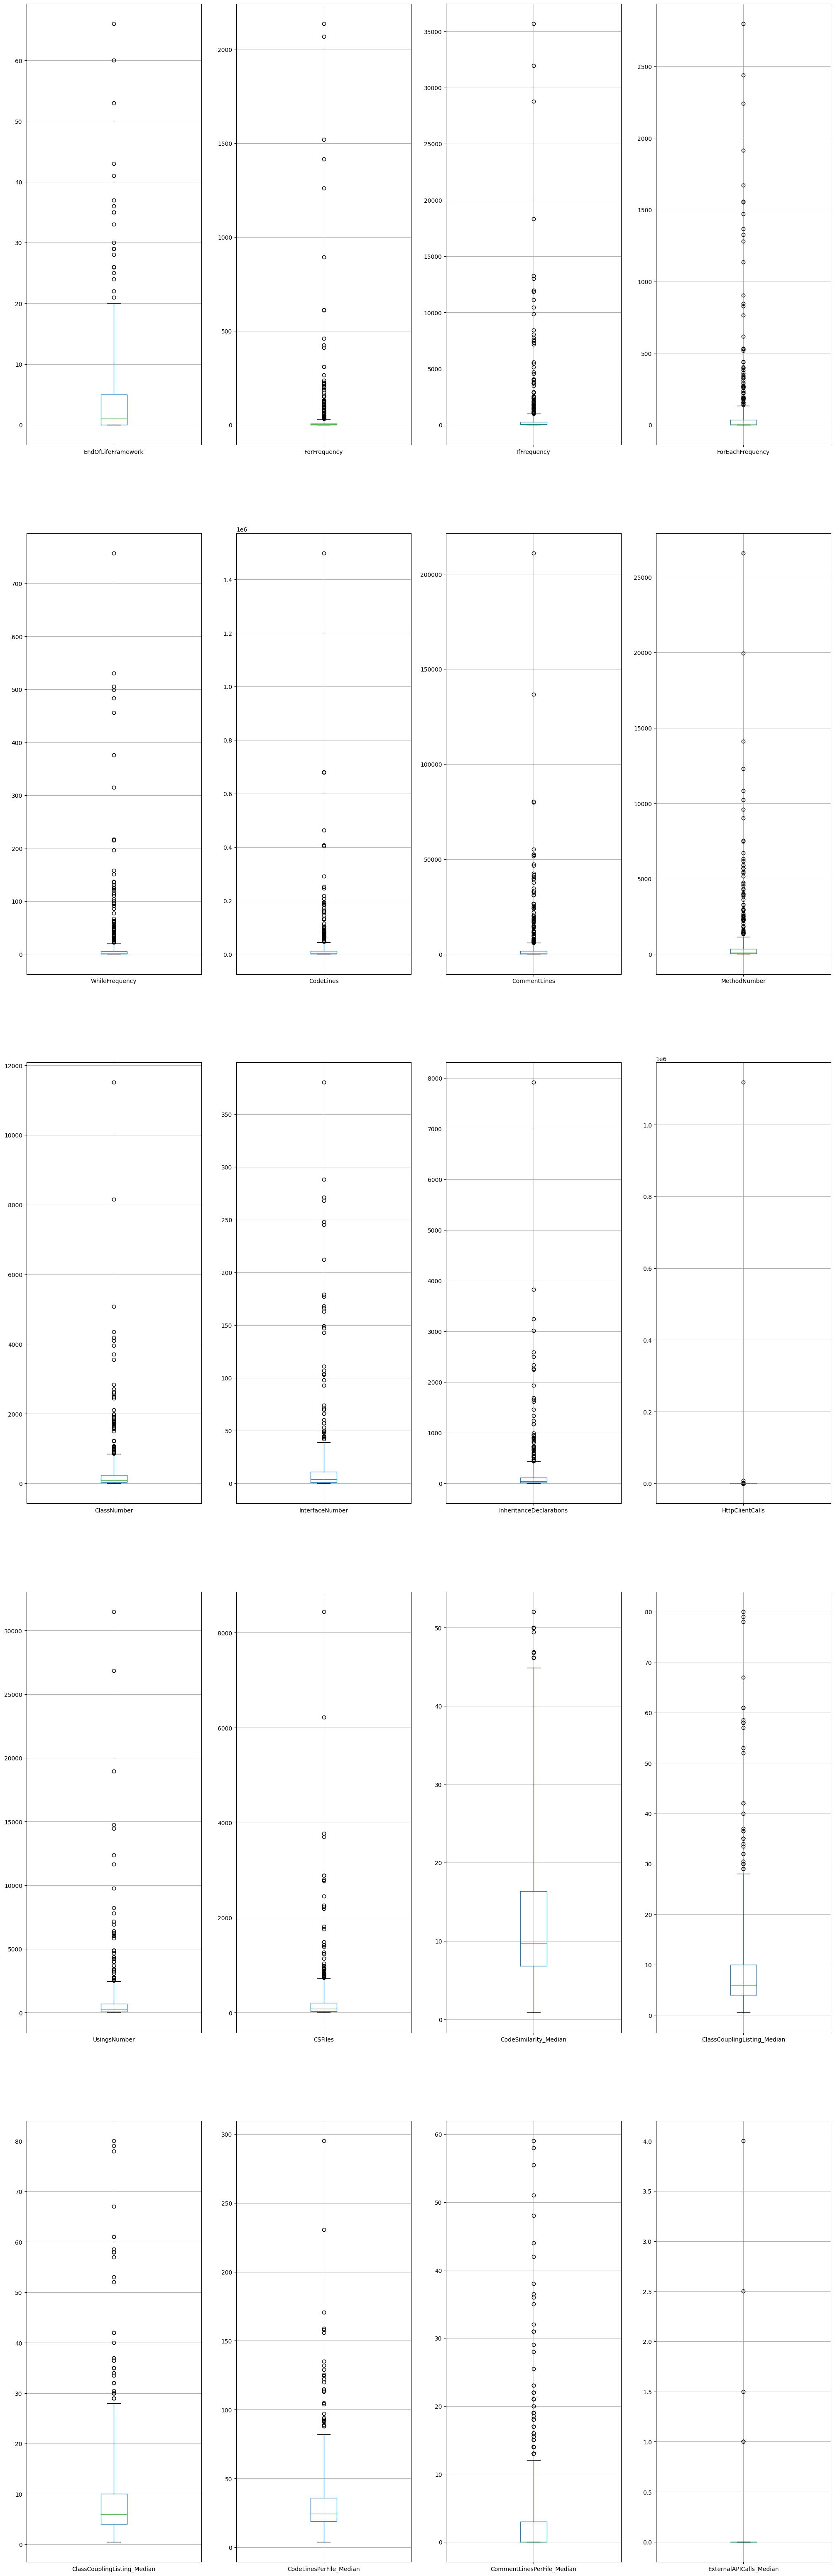

In [19]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+15], ax=axes[4][i], showfliers=True, whis=3)

Removing outliers based on percentiles

In [20]:
columns = dfcopy.select_dtypes(include=np.number).columns
dfcopy = remove_outliers(columns, dfcopy)


In [21]:
dfcopy.drop(columns=['Project_ID','ClassCouplingListing', 'CodeSimilarity', 'ExternalAPICalls', 'ExternalAPIExtracted','CodeLinesPerFile','CommentLinesPerFile'], axis=1,inplace=True)

Multiple imputation with knn imputation to remove 0s

Imputing twice to account for nan's and 0's

In [22]:
imputed_nans = impute_nans(dfcopy)
imputed_nans.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
count,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627
mean,2,13,302,32,6,12219,1476,281,187,8,91,29,468,159,10,7,26,1,0
std,2,28,548,55,13,19693,2566,389,232,9,115,325,543,177,4,3,9,2,0
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1,1,0,4,0,0
25%,0,0,17,1,0,1249,44,35,31,1,12,0,90,34,7,4,19,0,0
50%,1,1,67,7,1,3868,257,104,86,4,40,0,247,83,10,6,24,0,0
75%,3,7,246,33,5,11687,1466,344,232,11,116,2,665,208,15,8,32,3,0
max,8,156,2899,268,63,83141,12332,2055,892,39,517,7659,2535,658,19,16,50,8,0


In [23]:
imputed_nans.drop('ExternalAPICalls_Median', inplace=True, axis=1)
dfcopy = impute_zero_values(imputed_nans)

In [24]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627
mean,3,15,302,33,8,12219,1476,281,187,9,91,54,471,159,10,7,26,3
std,2,28,548,54,13,19693,2566,389,232,9,115,334,543,177,4,3,9,2
min,0,1,1,1,1,11,1,1,1,0,1,-1,1,1,1,0,4,0
25%,1,2,17,2,2,1249,44,35,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3868,257,104,86,5,40,11,247,83,10,6,24,3
75%,4,12,246,33,6,11687,1466,344,232,12,116,26,665,208,15,8,32,4
max,8,156,2899,268,63,83141,12332,2055,892,39,517,7659,2535,658,19,16,50,8


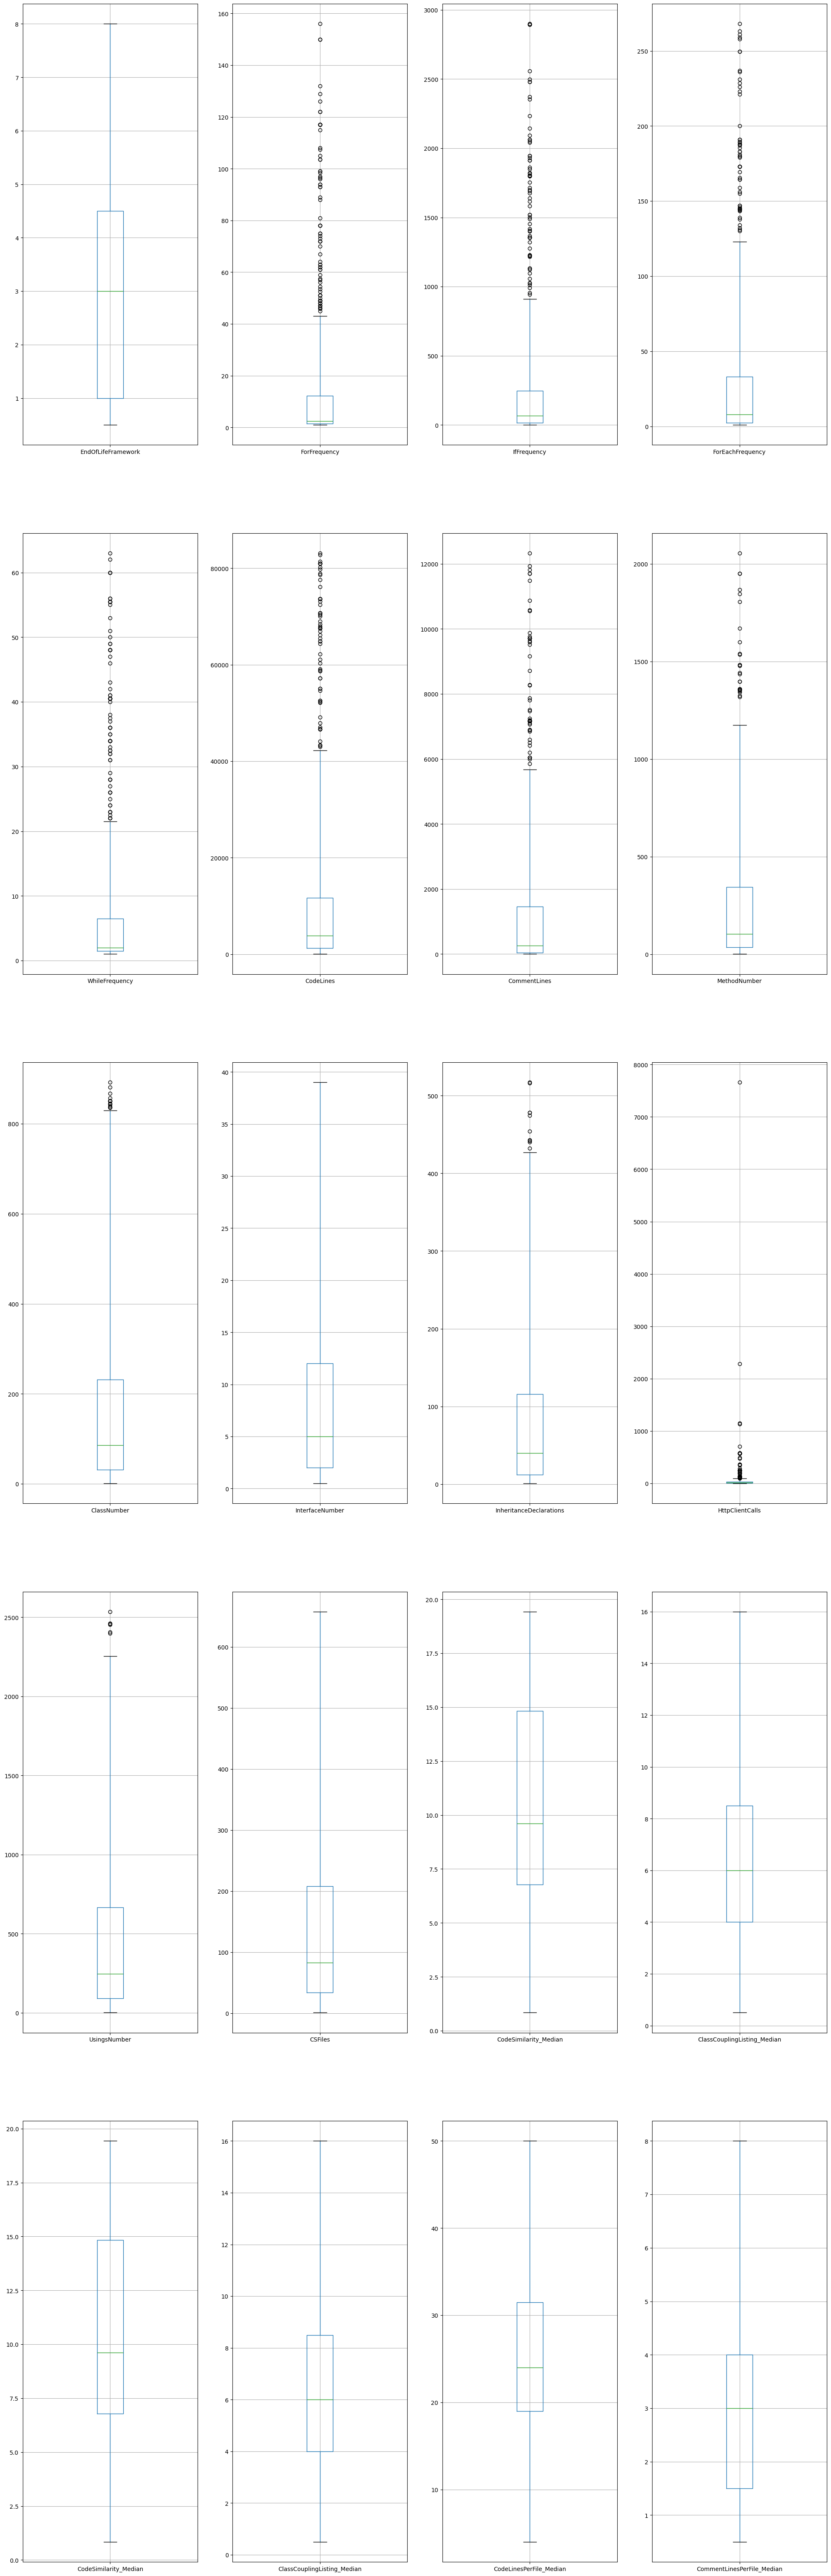

In [25]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+14], ax=axes[4][i], showfliers=True, whis=3)

In [26]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627
mean,3,15,302,33,8,12219,1476,281,187,9,91,54,471,159,10,7,26,3
std,2,28,548,54,13,19693,2566,389,232,9,115,334,543,177,4,3,9,2
min,0,1,1,1,1,11,1,1,1,0,1,-1,1,1,1,0,4,0
25%,1,2,17,2,2,1249,44,35,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3868,257,104,86,5,40,11,247,83,10,6,24,3
75%,4,12,246,33,6,11687,1466,344,232,12,116,26,665,208,15,8,32,4
max,8,156,2899,268,63,83141,12332,2055,892,39,517,7659,2535,658,19,16,50,8


In [27]:
def histograms(dfcopy):
    columns = dfcopy.select_dtypes(include=np.number).columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

    for i, column in enumerate(columns):
        row_index = i // 4
        col_index = i % 4
        axes[row_index, col_index].hist(dfcopy[column])
        axes[row_index, col_index].set_title(column)

    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

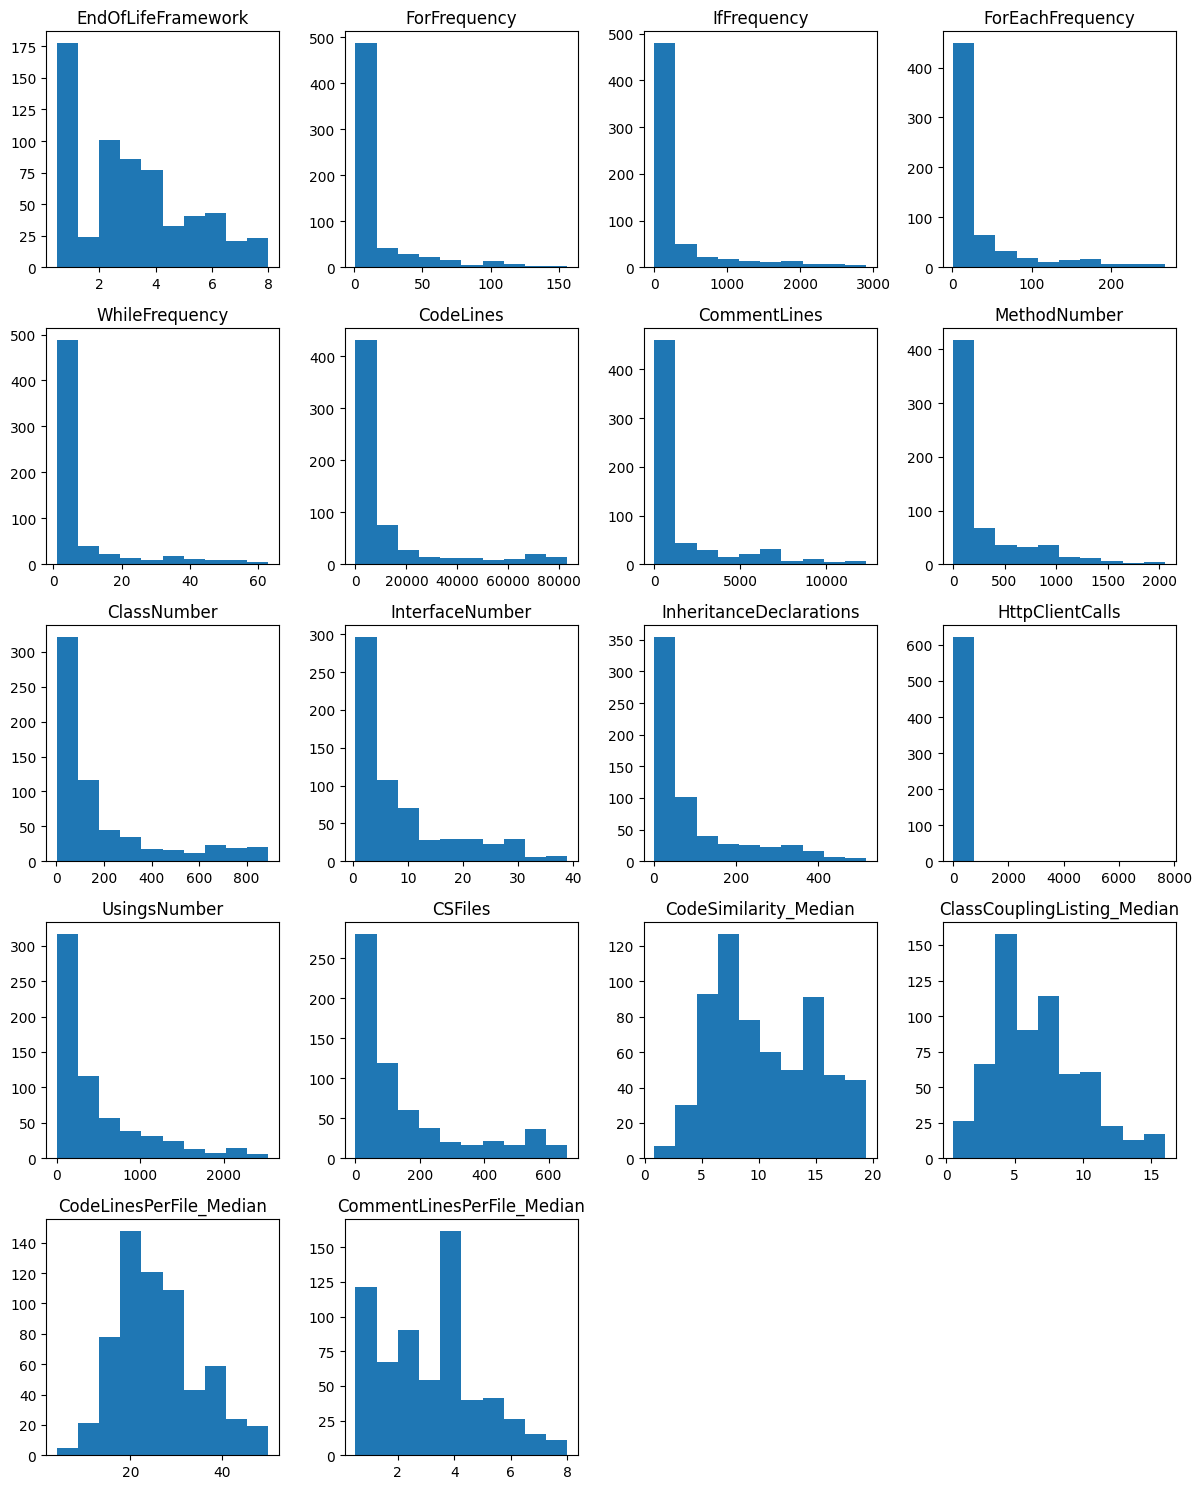

In [28]:
histograms(dfcopy)

In [29]:
dfcopy = combine_term_frequency(dfcopy)

In [30]:
dfcopy.describe()

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
count,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627
mean,3,12219,1476,281,187,9,91,54,471,159,10,7,26,3,357
std,2,19693,2566,389,232,9,115,334,543,177,4,3,9,2,625
min,0,11,1,1,1,0,1,-1,1,1,1,0,4,0,5
25%,1,1249,44,35,31,2,12,4,91,34,7,4,19,2,24
50%,3,3868,257,104,86,5,40,11,247,83,10,6,24,3,88
75%,4,11687,1466,344,232,12,116,26,665,208,15,8,32,4,298
max,8,83141,12332,2055,892,39,517,7659,2535,658,19,16,50,8,3242


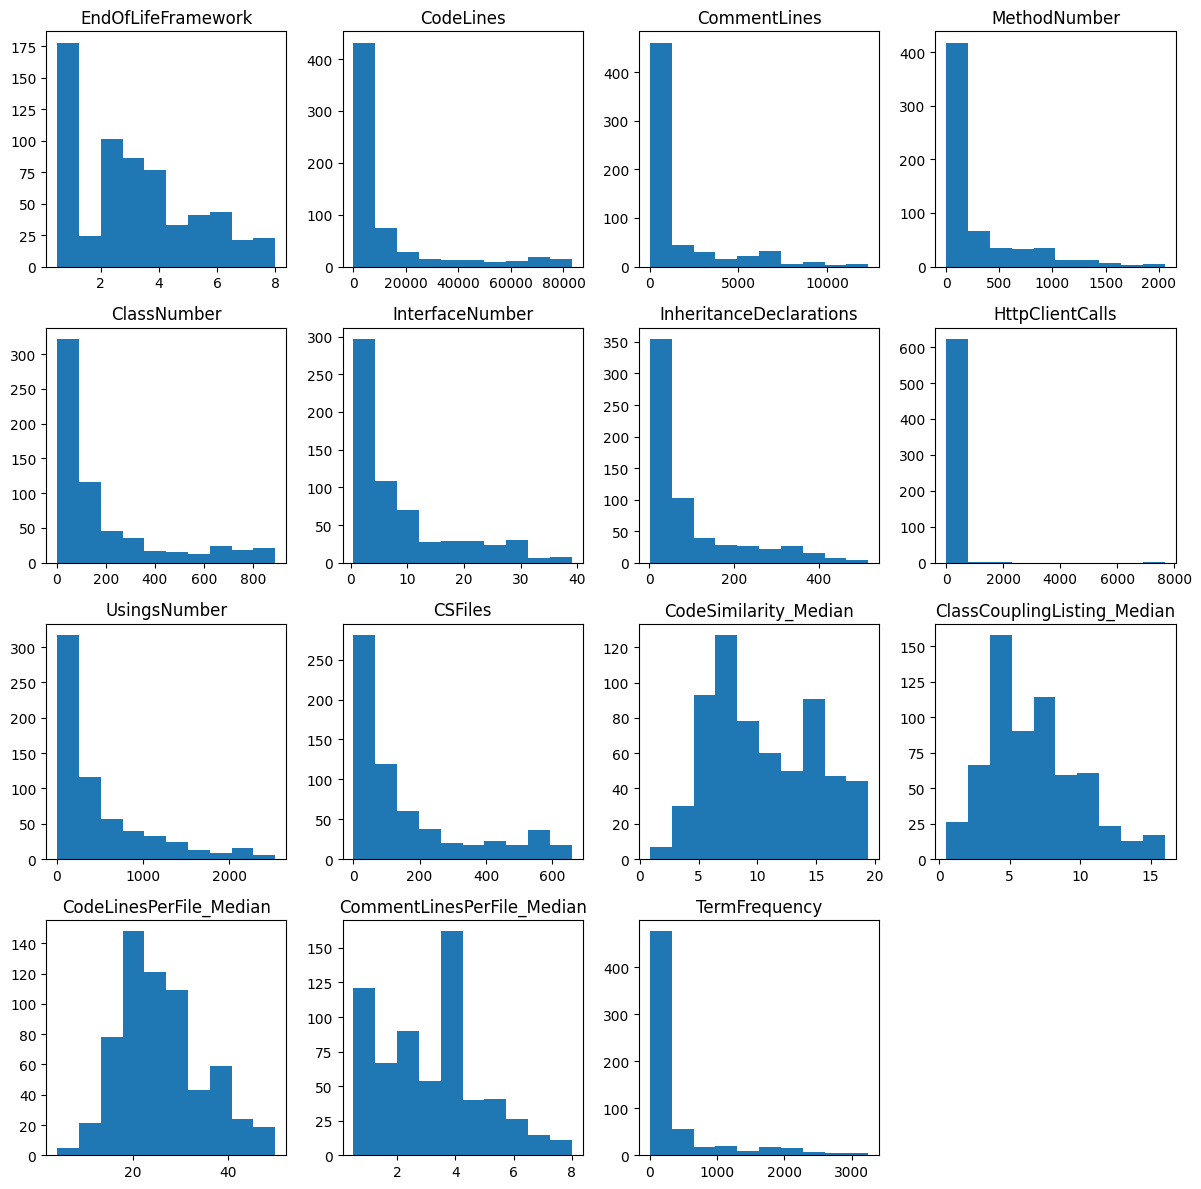

In [31]:
histograms(dfcopy)

In [32]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CodeSimilarity_Median',
       'ClassCouplingListing_Median', 'CodeLinesPerFile_Median','CommentLinesPerFile_Median', 'TermFrequency','EndOfLifeFramework']
yeojohnson(columns, dfcopy)

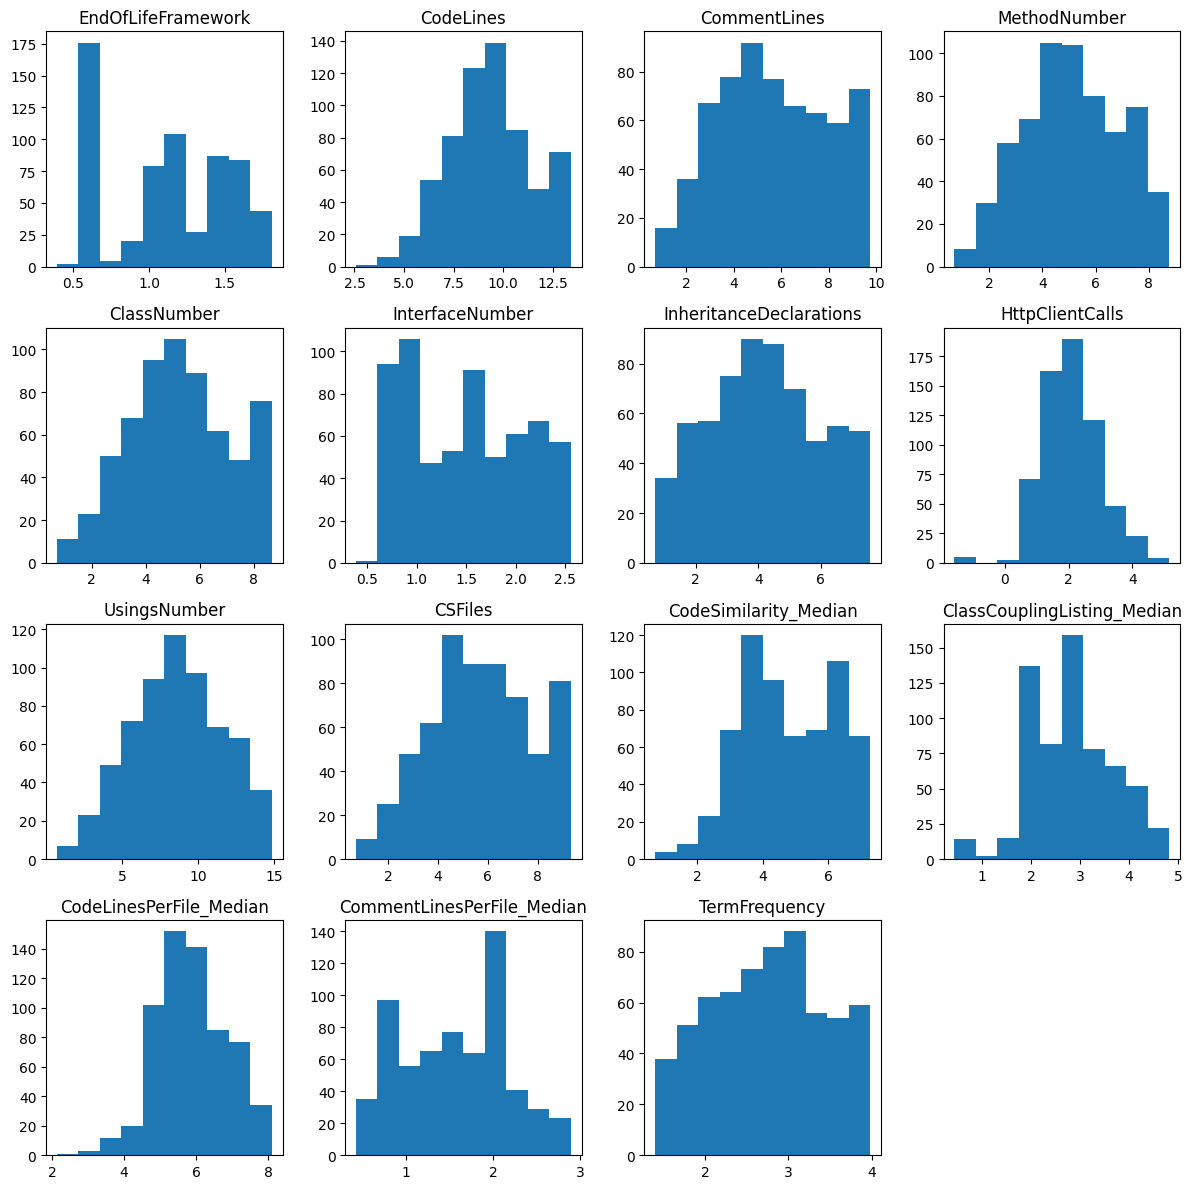

In [33]:
histograms(dfcopy)

In [34]:
column_std = dfcopy.std()

sorted_columns = column_std.sort_values(ascending=False)

print(sorted_columns)

UsingsNumber                  3
CommentLines                  2
CodeLines                     2
CSFiles                       2
ClassNumber                   2
MethodNumber                  2
InheritanceDeclarations       2
CodeSimilarity_Median         1
CodeLinesPerFile_Median       1
HttpClientCalls               1
ClassCouplingListing_Median   1
TermFrequency                 1
CommentLinesPerFile_Median    1
InterfaceNumber               1
EndOfLifeFramework            0
dtype: float64


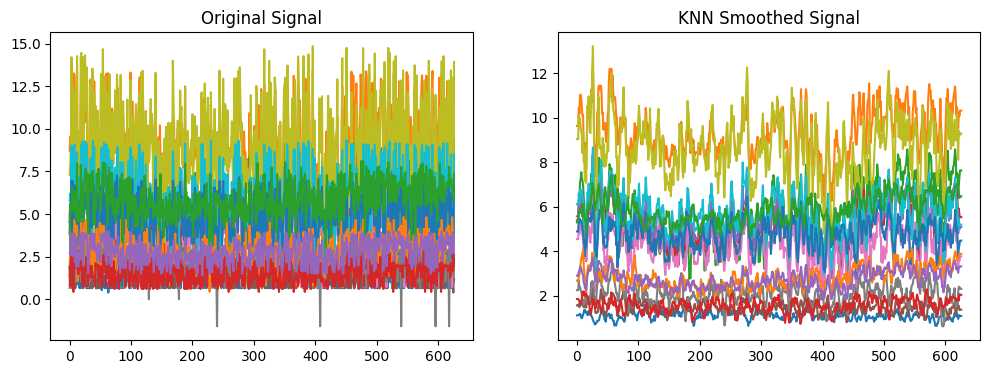

In [35]:
window_size_knn = 5

smoothed_signal_knn = knn_smoothing(dfcopy, window_size_knn)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dfcopy)
plt.title('Original Signal')

plt.subplot(1, 2, 2)
plt.plot(smoothed_signal_knn)
plt.title('KNN Smoothed Signal')

plt.show()

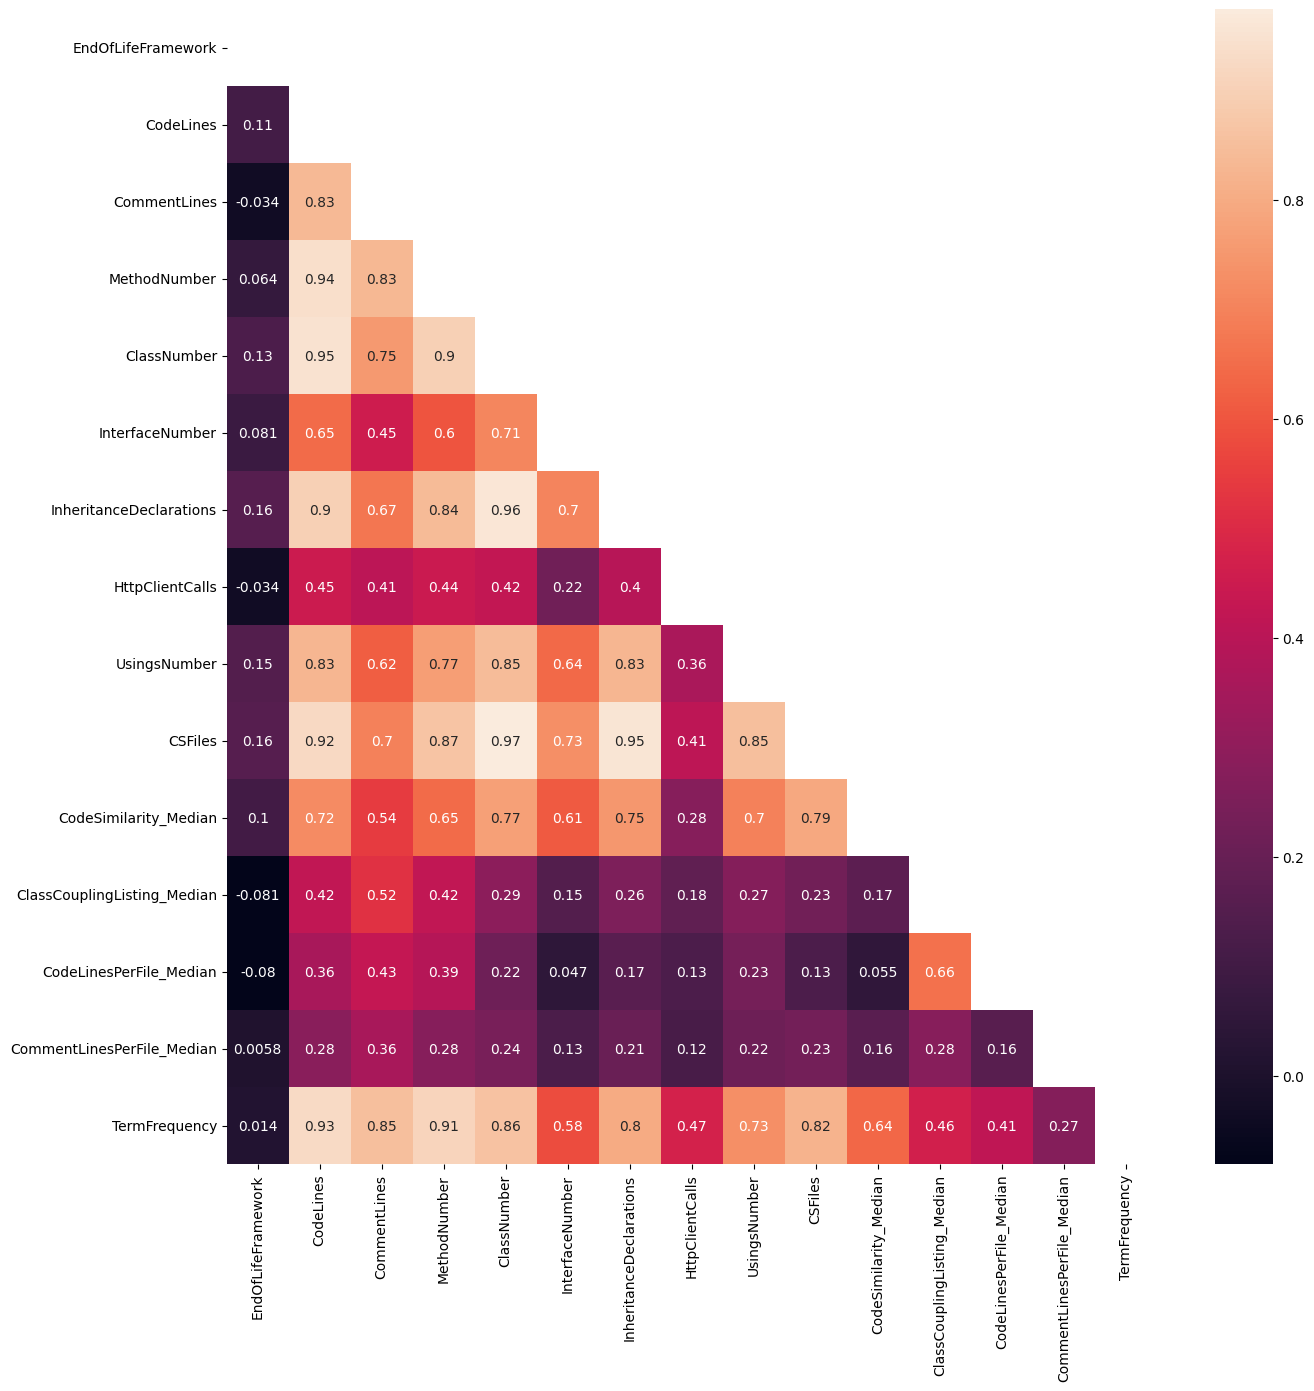

In [36]:
corr_m = dfcopy.corr()

mask = np.triu(corr_m)

plt.figure(figsize=(15,15))

sns.heatmap(corr_m, annot=True, mask=mask)
plt.show()

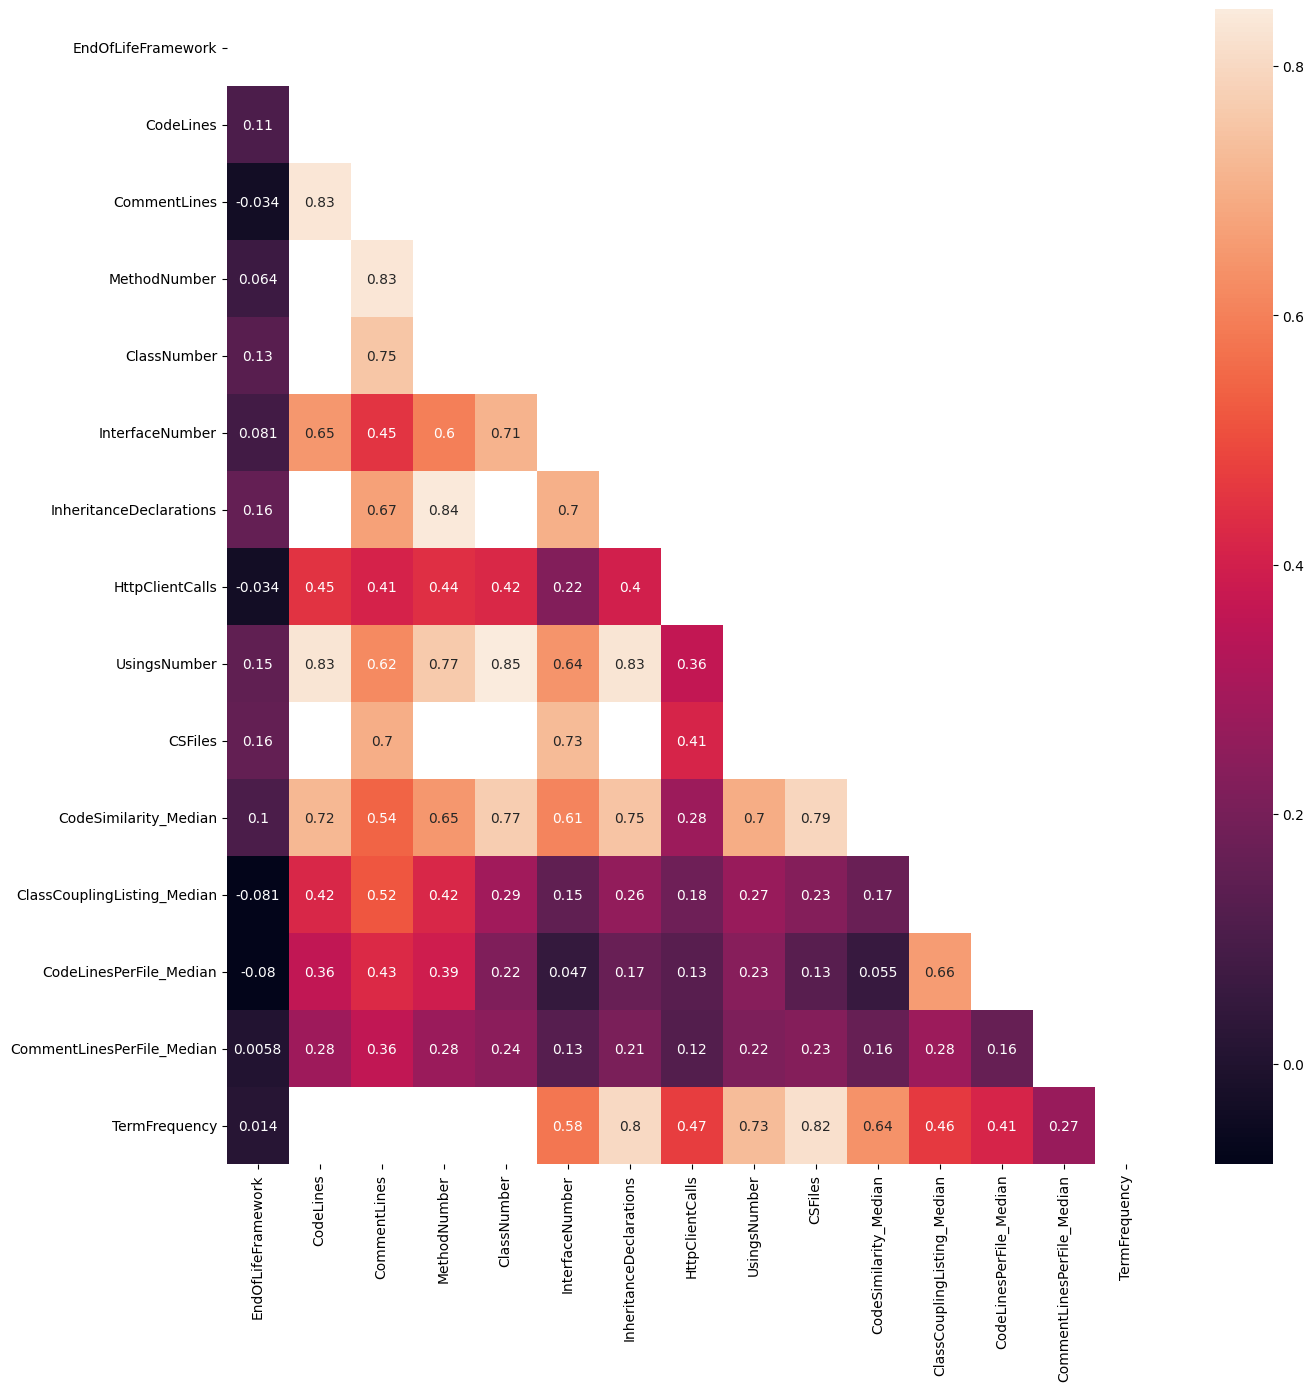

In [37]:
# Remove high correlation from sns
corr = (corr_m[(corr_m < 0.85)].dropna(thresh=2).dropna(thresh=2, axis=1))
mask = np.triu(corr)

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

# PCA


In [38]:
knn_df = smoothed_signal_knn

In [77]:
X_s = preprocessing.StandardScaler().fit_transform(knn_df)
pcas = decomposition.PCA(n_components=2)
ress = pcas.fit_transform(X_s)
print(pcas.explained_variance_ratio_)
print('Explained variance: ', np.sum(pcas.explained_variance_ratio_))

[0.58129163 0.155809  ]
Explained variance:  0.7371006287241142


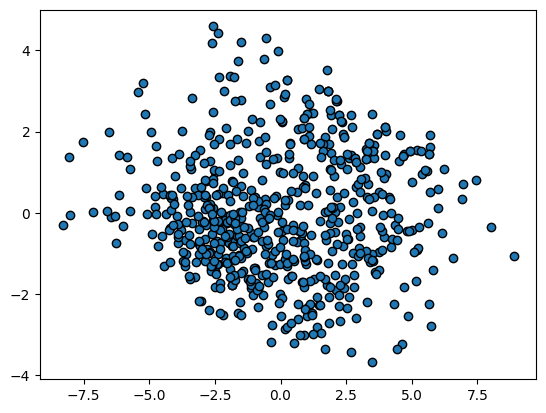

In [79]:
scatter = plt.scatter(ress[:, 0], ress[:, 1],edgecolors='black')
plt.show()

K Means

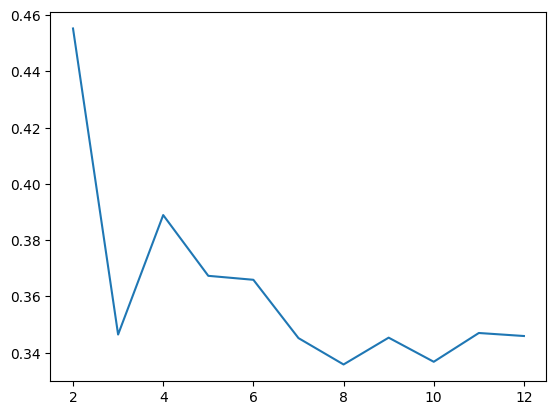

In [80]:
from sklearn.metrics import silhouette_score
silhouette = []
n_clusters = range(2,13)
for n in n_clusters:
    k_mean = cluster.KMeans(n_clusters=n, random_state=88, n_init=10)
    k_mean_clus = k_mean.fit_predict(ress)
    silhouette.append(silhouette_score(ress, k_mean.labels_))

plt.plot(n_clusters, silhouette)
plt.show()

## It can be seen that the elbow lies at 9

In [81]:
#Initialize the class object
kmeans = KMeans(n_clusters=7,n_init=10)
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

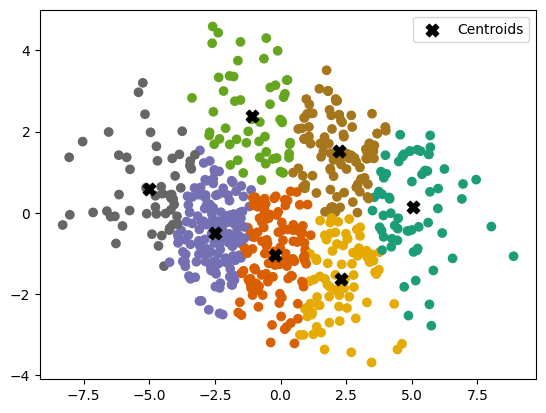

In [82]:
plt.scatter(newpca[:,0],newpca[:,1], c=means, cmap='Dark2')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color='k', marker='X', label='Centroids')
plt.legend()
plt.show()

# DBSCAN

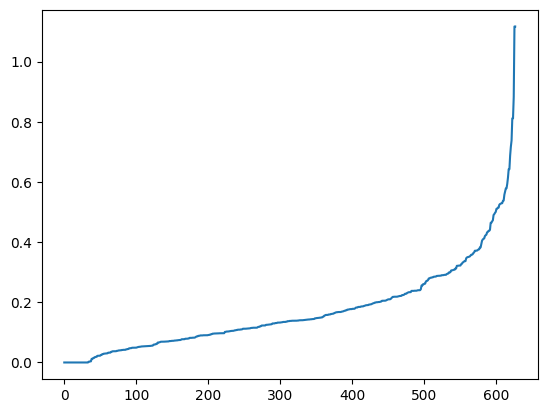

In [83]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(ress)
distances, indices = neighbors_fit.kneighbors(ress)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [84]:
dbscan=DBSCAN(eps = 0.59, min_samples = 17)
yhat = dbscan.fit_predict(ress)
clusters = np.unique(yhat)
len(clusters)

4

## With noise

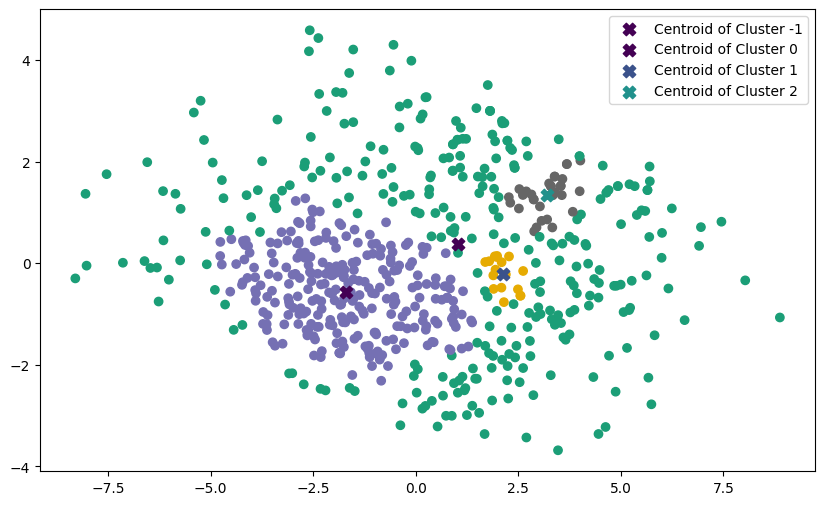

In [85]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(ress[:,0], ress[:,1] , c=yhat, cmap='Dark2')
plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    cluster_points = ress[yhat == cluster]
    centroid = np.mean(cluster_points, axis=0)
    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

## After filtering out the noise

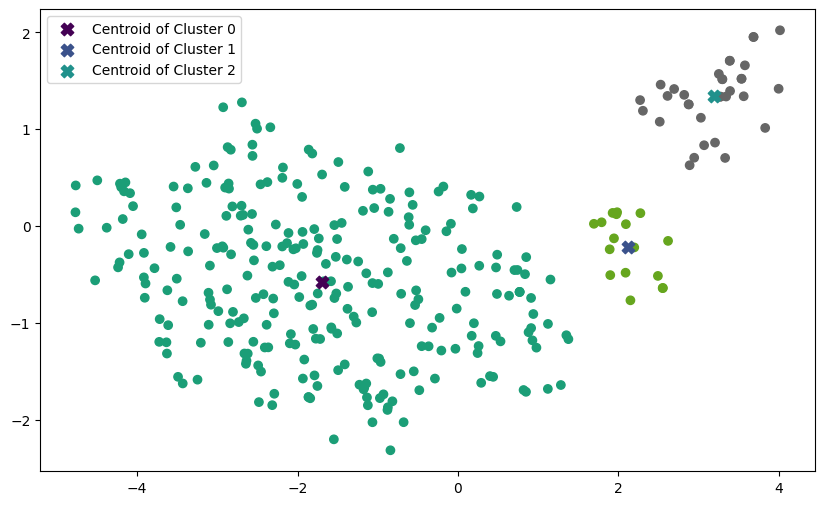

In [86]:
plt.figure(figsize=(10, 6))

filtered_points = ress[yhat != -1]
filtered_labels = yhat[yhat != -1]

scatter = plt.scatter(filtered_points[:, 0], filtered_points[:, 1], c=filtered_labels, cmap='Dark2')

plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    if cluster != -1:
        cluster_points = ress[yhat == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroid_color = plt.cm.viridis(cluster / len(clusters))

        plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                    label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Gausian Mixture Clustering

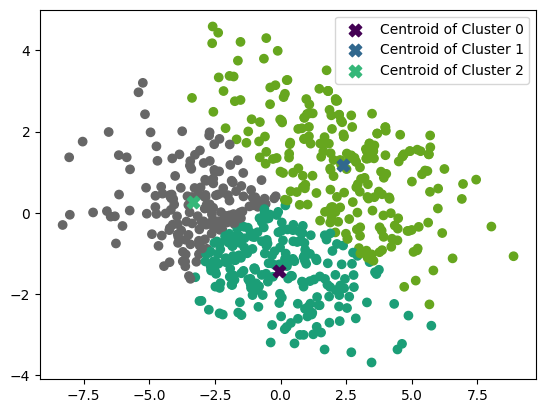

In [87]:
gaussian_mdl = GaussianMixture(n_components=3, random_state=42)
gaussian_mdl.fit(ress)
gaussian_res = gaussian_mdl.fit_predict(ress)

clusters = np.unique(gaussian_res) # get the unique clusters

scatter = plt.scatter(ress[:,0], ress[:,1] , c=gaussian_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[gaussian_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Birch Clustering

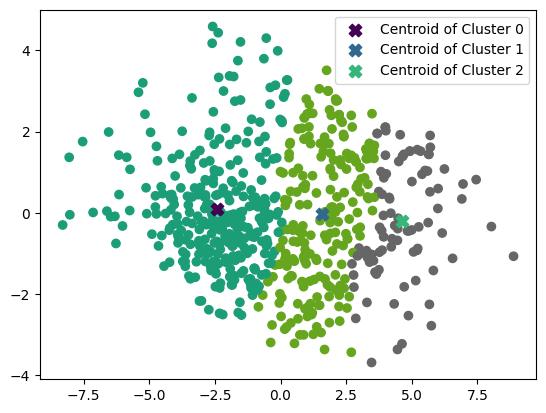

In [88]:
birch_model = Birch(branching_factor=50, n_clusters=3, threshold=1.75)
birch_model.fit(ress)
birch_res = birch_model.fit_predict(ress)

clusters = np.unique(birch_res) # get the clusters
scatter = plt.scatter(ress[:,0], ress[:,1] , c=birch_res, cmap='Dark2')


for cluster in clusters:
    cluster_points = ress[birch_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Meanshift clustering

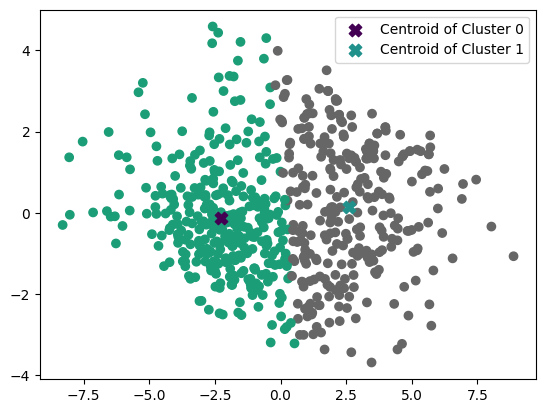

In [89]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
meanshit_ress = ms.fit_predict(ress)
labels = ms.labels_
clusters = np.unique(meanshit_ress)
centers = ms.cluster_centers_
scatter = plt.scatter(ress[:,0], ress[:,1] , c=labels, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Bayesian Gaussian Mixture

c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\adria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


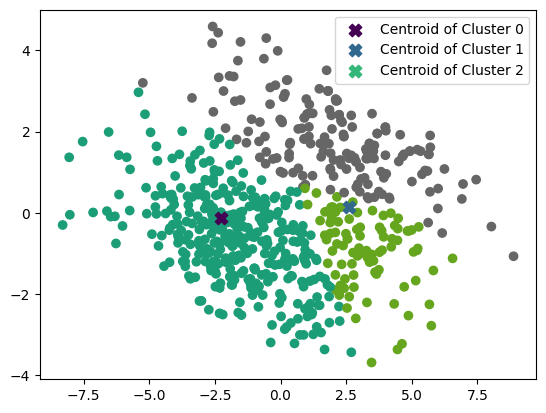

In [90]:
bgm = BayesianGaussianMixture(n_components=3, random_state=54)
bgm.fit(ress)
bgm_res = bgm.fit_predict(ress)
clusters = np.unique(bgm_res)

scatter = plt.scatter(ress[:,0], ress[:,1] , c=bgm_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# GM

## Extract points closest to centroids

In [116]:
clusters = np.unique(gaussian_res)

selected_points_in_clusters = {}

for cluster in clusters:
    cluster_points = ress[gaussian_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Top closest points to the centroids
    k = 5
    closest_indices = np.argsort(distances)[:k]
    closest_points = cluster_points[closest_indices]

    selected_points_in_clusters[cluster] = closest_points

for cluster, points in selected_points_in_clusters.items():
    print(f'{cluster} {points}')

0 [[-0.03207782 -1.26633864]
 [-0.20739683 -1.28480812]
 [-0.28754602 -1.57409658]
 [ 0.24422093 -1.31055462]
 [ 0.25699623 -1.23815986]]
1 [[2.30486964 1.19102292]
 [2.26982073 1.30102258]
 [2.5148187  1.07773585]
 [2.61173108 1.34439481]
 [2.52590254 1.46077151]]
2 [[-3.36731597  0.39041553]
 [-3.51152223  0.1934303 ]
 [-3.54473297  0.40850399]
 [-3.13512618  0.44682944]
 [-3.46288349  0.01354491]]


## Map points to rows and load them in a dataframe

In [117]:
original_rows = {}

for cluster, points in selected_points_in_clusters.items():
    print(points)
    original_indices = np.where(np.isin(ress, points).all(axis=1))[0]
    original_rows[cluster] = dataframe.iloc[original_indices]
    
for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

[[-0.03207782 -1.26633864]
 [-0.20739683 -1.28480812]
 [-0.28754602 -1.57409658]
 [ 0.24422093 -1.31055462]
 [ 0.25699623 -1.23815986]]
[[2.30486964 1.19102292]
 [2.26982073 1.30102258]
 [2.5148187  1.07773585]
 [2.61173108 1.34439481]
 [2.52590254 1.46077151]]
[[-3.36731597  0.39041553]
 [-3.51152223  0.1934303 ]
 [-3.54473297  0.40850399]
 [-3.13512618  0.44682944]
 [-3.46288349  0.01354491]]
0                                Project_ID  EndOfLifeFramework  ForFrequency  \
106  03642f58-a5e3-4e74-b782-b6c1706ae141                   8             0   
130  69dbfeea-b8b2-437d-b65c-47945cc09c42                   5             0   
131  c109b501-af4e-4584-aed3-519191d75f69                   0             2   
268  630cb883-5e47-4516-88e5-1ec77d5cfd44                  29            62   
434  8e2771ce-0155-4490-bd48-22b2d7fb8dec                   0             0   

     IfFrequency  ForEachFrequency  WhileFrequency  CodeLines  CommentLines  \
106           42                 1            

In [118]:
gsm_clustered_df = pd.concat([df.assign(Cluster=cluster) for cluster, df in original_rows.items()])
gsm_clustered_df

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
106,03642f58-a5e3-4e74-b782-b6c1706ae141,8,0,42,1,0,2558,79,45,83,...,40,"[1, 0, 1, 0, 6, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, ...",0,256,"[3, 12, 1, 0, 1, 2, 2, 2, 2, 0, 5, 13, 5, 10, ...","[18, 30, 11, 12, 9, 9, 16, 9, 14, 10, 18, 31, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 4.37, 2.4, 2.17, 2.31, 3.2, 1.24, 2.08, ...",86,0
130,69dbfeea-b8b2-437d-b65c-47945cc09c42,5,0,15,4,0,3187,25,41,65,...,42,"[1, 0, 0, 0, 3, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0,...",0,228,"[10, 9, 14, 11, 0, 5, 4, 2, 6, 6, 6, 6, 7, 6, ...","[50, 35, 51, 41, 11, 31, 13, 7, 13, 9, 30, 23,...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.54, 5.07, 0.5, 0.0, 3.17, 3.47, 5.73, 2.56,...",61,0
131,c109b501-af4e-4584-aed3-519191d75f69,0,2,146,36,1,5877,268,126,142,...,90,"[0, 0, 5, 0, 2, 0, 0, 0, 6, 0, 0, 5, 0, 0, 0, ...",0,518,"[9, 9, 17, 9, 9, 20, 10, 14, 4, 9, 7, 7, 7, 7,...","[73, 30, 31, 48, 31, 29, 61, 28, 54, 8, 23, 37...","[0, 0, 0, 5, 0, 0, 6, 0, 0, 0, 2, 1, 0, 0, 0, ...","[4.03, 3.26, 4.57, 3.3, 3.22, 3.34, 7.95, 8.13...",166,0
268,630cb883-5e47-4516-88e5-1ec77d5cfd44,29,62,602,104,15,18256,2640,730,328,...,195,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0,...",0,1369,"[82, 51, 8, 13, 2, 15, 18, 3, 4, 2, 79, 56, 6,...","[6, 284, 229, 32, 89, 15, 15, 15, 31, 28, 32, ...","[0, 10, 1, 0, 1, 17, 17, 17, 0, 1, 0, 3, 17, 0...","[7.01, 97.48, 6.79, 4.86, 9.03, 89.61, 10.41, ...",398,0
434,8e2771ce-0155-4490-bd48-22b2d7fb8dec,0,0,56,3,0,3167,69,77,91,...,39,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 12,...",6,403,"[4, 9, 3, 16, 8, 6, 4, 2, 0, 2, 3, 5, 9, 7, 0,...","[27, 27, 15, 44, 45, 16, 13, 8, 11, 18, 8, 20,...","[0, 3, 0, 2, 6, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, ...","[5.2, 3.74, 1.1, 2.1, 0.0, 0.54, 0.5, 0.43, 1....",101,0
9,e46ffaca-ad41-43b8-89ab-6e2ae9c1f7ff,1,0,8,0,0,478,127,23,21,...,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,64,"[3, 25, 47, 11, 21, 10, 5, 2, 3, 5, 10, 10, 5,...","[24, 62, 99, 12, 16, 38, 44, 14, 10, 14, 29, 4...","[0, 15, 50, 6, 9, 7, 12, 5, 2, 1, 4, 1, 1, 7, 7]","[8.11, 0.65, 0.53, 27.39, 0.43, 0.32, 0.0, 23....",15,1
10,867ecff4-0440-4f83-8437-100c5389f083,0,198,8402,765,110,156440,39541,3927,1608,...,811,"[0, 3, 0, 0, 0, 0, 2, 17, 1, 1, 0, 0, 1, 0, 1,...",12,9762,"[4, 3, 3, 3, 52, 2, 3, 3, 6, 6, 5, 17, 12, 28,...","[3, 13, 18, 21, 21, 381, 17, 7, 7, 11, 7, 10, ...","[0, 0, 0, 1, 0, 33, 0, 0, 0, 20, 0, 9, 12, 19,...","[20.58, 22.06, 20.2, 29.15, 9.81, 20.43, 8.53,...",1816,1
505,74142e72-4372-42c1-b01a-1c0aa6ef8134,1,0,119,7,1,3050,93,52,48,...,15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,274,"[12, 18, 13, 23, 14, 19, 1, 5, 3, 49, 6, 39, 6...","[50, 59, 128, 151, 129, 141, 19, 19, 15, 397, ...","[1, 3, 12, 12, 12, 12, 0, 0, 0, 16, 0, 5, 0, 3...","[64.89, 74.79, 64.52, 26.41, 11.35, 8.74, 8.8,...",48,1
548,129ee39c-17e6-4ade-a79a-bc10b18af1a9,4,23,162,5,8,3400,693,195,28,...,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,72,"[59, 6, 61, 8, 55, 62, 1, 10, 2, 13, 0, 10, 4,...","[439, 12, 440, 12, 12, 16, 384, 436, 7, 16, 14...","[107, 10, 112, 13, 15, 30, 159, 104, 3, 17, 3,...","[1.37, 7.33, 7.94, 8.02, 1.59, 2.83, 7.61, 7.5...",27,1
578,359cfd9c-25dc-4d96-b43f-b799524d4c3a,0,185,3682,270,215,132813,33146,5913,1650,...,719,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4232,"[64, 55, 57, 52, 67, 144, 64, 67, 53, 55, 61, ...","[10, 10, 13, 13, 143, 15, 12, 10, 12, 10, 8, 1...","[31, 31, 34, 38, 43, 47, 36, 31, 9, 31, 13, 39...","[7.05, 9.66, 7.62, 2.74, 0.57, 1.1, 1.18, 0.46...",933,1


In [119]:
gsm_clustered_df = combine_term_frequency(gsm_clustered_df)

In [120]:
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']
gsm_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
106,2558,83,83,43,86,0
130,3187,65,65,19,61,0
131,5877,142,142,185,166,0
268,18256,328,328,783,398,0
434,3167,91,91,59,101,0
9,478,21,21,8,15,1
10,156440,1608,1608,9475,1816,1
505,3050,48,48,127,48,1
548,3400,28,28,198,27,1
578,132813,1650,1650,4352,933,1


# K Means

In [94]:
kmeans = KMeans(n_clusters=7,n_init=10)
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

0 {'Centroid': (-5.142259535889671, 0.6337245550195438), 'ClosestPoint': (-5.122597840243235, 0.6178386838959128)}
1 {'Centroid': (2.09490805390354, -1.6294221153165338), 'ClosestPoint': (2.0904654480308644, -1.5271864694967865)}
2 {'Centroid': (-2.592764418664343, -0.4754841400995771), 'ClosestPoint': (-2.624778863510028, -0.511099552694213)}
3 {'Centroid': (-0.43266862002930156, -0.9424177599020629), 'ClosestPoint': (-0.32288658210042337, -1.0480425479527589)}
4 {'Centroid': (-1.0720534871981326, 2.3941691149656212), 'ClosestPoint': (-1.1008840523354908, 2.304278084893599)}
5 {'Centroid': (5.045568559098363, 0.12021058973929075), 'ClosestPoint': (5.265857884107452, -0.3454945082814602)}
6 {'Centroid': (2.2104932800217267, 1.5215582627413908), 'ClosestPoint': (2.2698207310974756, 1.3010225867085639)}


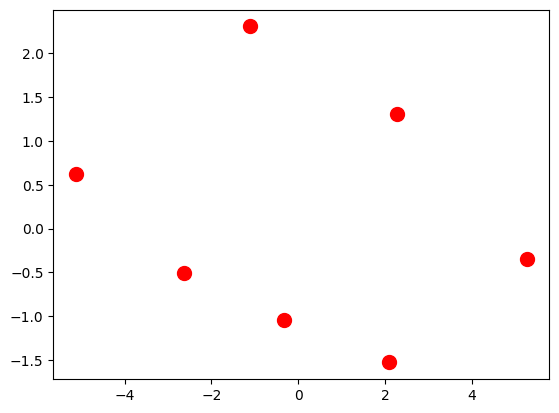

In [95]:
selected_points_in_clusters_km = {}

for i, centroid in enumerate(centroids):
    cluster_points = newpca[means == i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = cluster_points[closest_point_index]

    centroid_tuple = tuple(centroid)
    closest_point_tuple = tuple(closest_point)

    selected_points_in_clusters_km[i] = {'Centroid': centroid_tuple, 'ClosestPoint': closest_point_tuple}
    plt.scatter(closest_point[0], closest_point[1], s=100, color='red', marker='o', label=f'Closest Point to Centroid {i}')


for cluster, points in selected_points_in_clusters_km.items():
    print(f'{cluster} {points}')

## Map points to rows

In [96]:
original_rows = {}

for cluster, points_info in selected_points_in_clusters_km.items():
    closest_point_tuple = points_info['ClosestPoint']
    distances = np.linalg.norm(ress - np.array(closest_point_tuple), axis=1)
    closest_index = np.argmin(distances)
    original_rows[cluster] = dataframe.iloc[closest_index]

for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

0 Project_ID                              96f6b0ce-36ba-40d6-96f5-2c34f03a5569
EndOfLifeFramework                                                         8
ForFrequency                                                               0
IfFrequency                                                               30
ForEachFrequency                                                           3
WhileFrequency                                                             0
CodeLines                                                               3482
CommentLines                                                              40
MethodNumber                                                              55
ClassNumber                                                               61
InterfaceNumber                                                            0
InheritanceDeclarations                                                   29
ExternalAPICalls           [0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,.

In [97]:
kmeans_clustered_df = pd.DataFrame(original_rows.values())
kmeans_clustered_df['Cluster'] = original_rows.keys()
kmeans_clustered_df

,Project_ID,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
240,96f6b0ce-36ba-40d6-96f5-2c34f03a5569,8,0,30,3,0,3482,40,55,61,...,29,"[0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",-1,424,"[3, 12, 0, 15, 3, 17, 3, 5, 0, 1, 6, 6, 15, 22...","[24, 90, 12, 178, 24, 85, 31, 17, 12, 13, 20, ...","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0.1, 15.51, 4.58, 4.24, 27.85, 18.2, 1.0, 0.9...",60,0
336,6ffe7c4c-5de1-45d2-8116-8d188d6a61bd,9,1,167,5,4,4368,1145,169,116,...,44,"[0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17,245,"[14, 2, 4, 10, 4, 4, 8, 55, 40, 48, 7, 2, 4, 1...","[80, 52, 18, 15, 44, 15, 16, 33, 55, 13, 32, 3...","[0, 0, 0, 17, 0, 0, 0, 5, 23, 18, 21, 0, 0, 0,...","[3.88, 1.09, 1.61, 4.06, 3.02, 2.25, 4.03, 5.6...",134,1
193,9cf88d5e-f763-46c6-8a87-a23f57f0941c,0,0,57,3,3,2375,273,104,76,...,39,"[0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,236,"[9, 3, 36, 13, 7, 22, 17, 6, 11, 33, 4, 12, 25...","[36, 25, 153, 46, 29, 99, 57, 18, 26, 139, 34,...","[0, 1, 19, 1, 0, 2, 5, 1, 8, 19, 0, 17, 7, 2, ...","[3.12, 28.05, 13.29, 16.7, 3.0, 6.64, 64.52, 1...",61,2
139,6a057199-0875-4ff1-ab45-fef72d5030aa,0,0,178,8,0,7542,194,166,233,...,90,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",18,684,"[5, 13, 2, 3, 8, 16, 1, 11, 10, 4, 16, 13, 12,...","[18, 39, 20, 16, 67, 81, 5, 72, 64, 29, 92, 79...","[0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1.71, 1.91, 0.4, 0.74, 1.66, 2.43, 0.53, 0.68...",218,3
478,7dd05783-debe-4887-85b7-40b980254b94,0,150,2043,328,91,83141,18783,6170,1873,...,881,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2453,"[15, 9, 30, 21, 7, 26, 69, 61, 18, 18, 40, 22,...","[26, 81, 3, 64, 165, 113, 34, 75, 68, 3, 11, 1...","[4, 10, 4, 1, 12, 9, 1, 1, 23, 1, 13, 106, 91,...","[1.26, 13.12, 0.33, 1.24, 3.19, 0.24, 1.38, 1....",911,4
490,a253ff05-a600-42ef-ba8d-2262c8dcdea2,4,0,18,9,0,466,32,15,14,...,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0,49,"[17, 28, 3, 15, 2, 1, 7, 32, 1, 3, 1, 2]","[51, 101, 24, 38, 18, 9, 41, 135, 8, 16, 14, 11]","[1, 3, 0, 3, 0, 0, 0, 25, 0, 0, 0, 0]","[4.42, 2.64, 0.6, 3.36, 0.15, 0.22, 75.27, 1.1...",12,5
578,359cfd9c-25dc-4d96-b43f-b799524d4c3a,0,185,3682,270,215,132813,33146,5913,1650,...,719,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4232,"[64, 55, 57, 52, 67, 144, 64, 67, 53, 55, 61, ...","[10, 10, 13, 13, 143, 15, 12, 10, 12, 10, 8, 1...","[31, 31, 34, 38, 43, 47, 36, 31, 9, 31, 13, 39...","[7.05, 9.66, 7.62, 2.74, 0.57, 1.1, 1.18, 0.46...",933,6


In [108]:
kmeans_clustered_df = combine_term_frequency(kmeans_clustered_df)

In [103]:
most_important_component_index = pcas.explained_variance_ratio_.argmax()
loadings = pcas.components_[most_important_component_index]
feature_names = dfcopy.columns
most_important_loadings = dict(zip(feature_names, loadings))
most_important_loadings_sorted = sorted(most_important_loadings.items(), key=lambda kv: kv[1], reverse=True)
for feature in most_important_loadings_sorted:
    print(f"{feature}")

('CodeLines', 0.3328670873398852)
('ClassNumber', 0.3244784664548063)
('MethodNumber', 0.32321501792671214)
('TermFrequency', 0.31591915523310093)
('CSFiles', 0.3089210465718587)
('InheritanceDeclarations', 0.3016896697363921)
('CommentLines', 0.28496472354099855)
('UsingsNumber', 0.2764487853329438)
('CodeSimilarity_Median', 0.23843240105562866)
('InterfaceNumber', 0.21019042077203404)
('ClassCouplingListing_Median', 0.2061509053258914)
('HttpClientCalls', 0.20108664258317416)
('CodeLinesPerFile_Median', 0.1865837115876693)
('CommentLinesPerFile_Median', 0.12508728931782453)
('EndOfLifeFramework', -0.03373876513192786)


In [113]:
features = most_important_loadings_sorted[:5]
features
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']

In [111]:
kmeans_clustered_df

,Project_ID,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
240,96f6b0ce-36ba-40d6-96f5-2c34f03a5569,8,3482,40,55,61,0,29,"[0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",-1,424,"[3, 12, 0, 15, 3, 17, 3, 5, 0, 1, 6, 6, 15, 22...","[24, 90, 12, 178, 24, 85, 31, 17, 12, 13, 20, ...","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0.1, 15.51, 4.58, 4.24, 27.85, 18.2, 1.0, 0.9...",60,0,33
336,6ffe7c4c-5de1-45d2-8116-8d188d6a61bd,9,4368,1145,169,116,15,44,"[0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17,245,"[14, 2, 4, 10, 4, 4, 8, 55, 40, 48, 7, 2, 4, 1...","[80, 52, 18, 15, 44, 15, 16, 33, 55, 13, 32, 3...","[0, 0, 0, 17, 0, 0, 0, 5, 23, 18, 21, 0, 0, 0,...","[3.88, 1.09, 1.61, 4.06, 3.02, 2.25, 4.03, 5.6...",134,1,177
193,9cf88d5e-f763-46c6-8a87-a23f57f0941c,0,2375,273,104,76,0,39,"[0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,236,"[9, 3, 36, 13, 7, 22, 17, 6, 11, 33, 4, 12, 25...","[36, 25, 153, 46, 29, 99, 57, 18, 26, 139, 34,...","[0, 1, 19, 1, 0, 2, 5, 1, 8, 19, 0, 17, 7, 2, ...","[3.12, 28.05, 13.29, 16.7, 3.0, 6.64, 64.52, 1...",61,2,63
139,6a057199-0875-4ff1-ab45-fef72d5030aa,0,7542,194,166,233,9,90,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",18,684,"[5, 13, 2, 3, 8, 16, 1, 11, 10, 4, 16, 13, 12,...","[18, 39, 20, 16, 67, 81, 5, 72, 64, 29, 92, 79...","[0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[1.71, 1.91, 0.4, 0.74, 1.66, 2.43, 0.53, 0.68...",218,3,186
478,7dd05783-debe-4887-85b7-40b980254b94,0,83141,18783,6170,1873,28,881,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2453,"[15, 9, 30, 21, 7, 26, 69, 61, 18, 18, 40, 22,...","[26, 81, 3, 64, 165, 113, 34, 75, 68, 3, 11, 1...","[4, 10, 4, 1, 12, 9, 1, 1, 23, 1, 13, 106, 91,...","[1.26, 13.12, 0.33, 1.24, 3.19, 0.24, 1.38, 1....",911,4,2612
490,a253ff05-a600-42ef-ba8d-2262c8dcdea2,4,466,32,15,14,0,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0,49,"[17, 28, 3, 15, 2, 1, 7, 32, 1, 3, 1, 2]","[51, 101, 24, 38, 18, 9, 41, 135, 8, 16, 14, 11]","[1, 3, 0, 3, 0, 0, 0, 25, 0, 0, 0, 0]","[4.42, 2.64, 0.6, 3.36, 0.15, 0.22, 75.27, 1.1...",12,5,27
578,359cfd9c-25dc-4d96-b43f-b799524d4c3a,0,132813,33146,5913,1650,30,719,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,4232,"[64, 55, 57, 52, 67, 144, 64, 67, 53, 55, 61, ...","[10, 10, 13, 13, 143, 15, 12, 10, 12, 10, 8, 1...","[31, 31, 34, 38, 43, 47, 36, 31, 9, 31, 13, 39...","[7.05, 9.66, 7.62, 2.74, 0.57, 1.1, 1.18, 0.46...",933,6,4352


In [114]:
kmeans_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
240,3482,61,61,33,60,0
336,4368,116,116,177,134,1
193,2375,76,76,63,61,2
139,7542,233,233,186,218,3
478,83141,1873,1873,2612,911,4
490,466,14,14,27,12,5
578,132813,1650,1650,4352,933,6


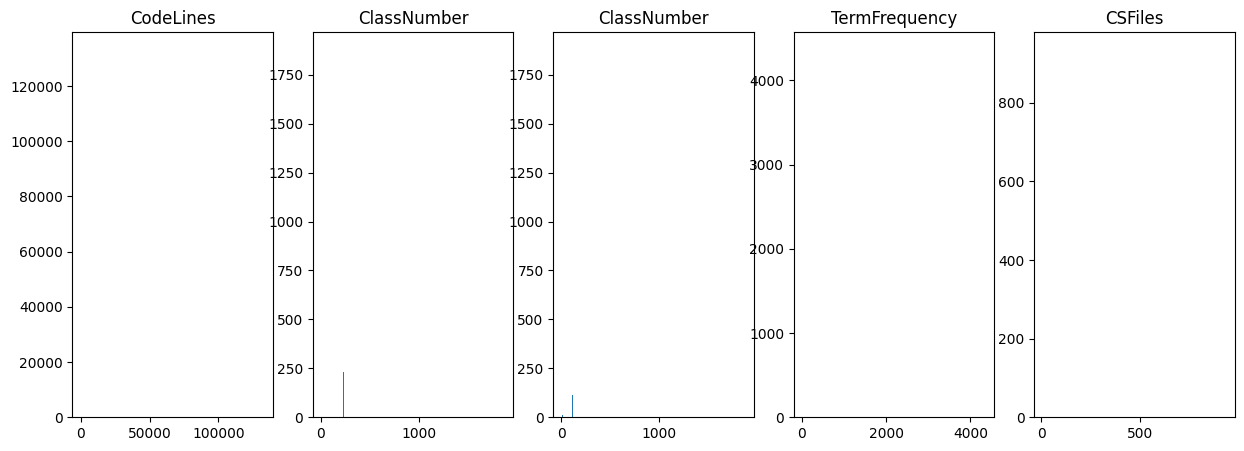

In [110]:
num_subplots = len(columns_to_plot)

fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    axes[i].bar(kmeans_clustered_df[column], kmeans_clustered_df[column])
    axes[i].set_title(column)



Trying a supervised learning model by using the cluster labels

In [ ]:
gaussian_df = dfcopy
gaussian_df['Cluster_Labels'] = gaussian_res
gaussian_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,9,5,5,5,2,4,1,7,6,5,2,4,2,3,0
1,1,10,4,5,6,1,5,4,8,6,4,3,6,1,3,0
2,1,9,6,5,5,1,4,2,9,6,5,2,6,2,3,0
3,1,13,9,8,8,3,7,3,14,9,7,4,5,3,4,0
4,1,8,3,4,4,1,3,1,7,4,3,3,7,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1,10,8,5,5,2,4,2,8,5,4,3,7,2,3,2
623,1,8,5,3,2,1,1,1,6,2,2,5,7,2,3,2
624,2,12,9,7,6,1,5,3,13,7,5,4,6,2,4,2
625,1,8,7,4,3,0,2,2,6,3,4,4,6,3,3,2


Confusion matrix

Prediction: The source code does not have technical debt

True Positive: The source code does not have technical debt

True Negative: The source code has technical debt

False Positive: The source code has technical debt, despite claiming it doesn't

False Negative: The source code doesn't have technical debt, despite claiming it does

In [ ]:
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
 
# ax.scatter3D(ressdbscan[:,0], ressdbscan[:,1],ressdbscan[:,2] , c=yhat)
 
# plt.show()

This saves the trained model into a pickle file that can then be loaded into the main system and used

In [ ]:
model_pkl_file = "technical_debt_model.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid_search, file)